In [1]:
import numpy as np  # type: ignore
import pandas as pd # type: ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
# Pivot table -> categorical column (take simple column wise data and group it 2D table)

df = sns.load_dataset('tips') # toy dataset
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
# according to gender what is avg total bil

df.groupby('sex', observed = False)[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [4]:
# smoker avg bill with gender

# R1
df.groupby(['sex', 'smoker'], observed = False)[['total_bill']].mean()
df.groupby(['sex', 'smoker'], observed = False)[['total_bill']].mean().unstack()

# R2
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', observed = False) # by default mean()

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [5]:
# aggfunc -> sum, min, mean, max, std

df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum', observed = False)
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'count', observed = False)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [6]:
# all col together

df.pivot_table(index = 'sex', columns = 'smoker', values = ['size', 'total_bill', 'tip'], observed = False)['tip']
df.pivot_table(index = 'sex', columns = 'smoker', values = ['size', 'total_bill', 'tip'], observed = False)

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [7]:
# multi-dimensional pivot table

df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = 'total_bill', observed = False) 
df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['size', 'tip', 'total_bill'], observed = False) 
df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['size', 'tip', 'total_bill'], aggfunc = {
    'size': 'mean',
    'tip': 'max',
    'total_bill': 'sum'  
}, observed = False)

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [8]:
# margins -> add extra row & column and give total

df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum', margins = True, observed = False)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [9]:
df = pd.read_csv('./expense_data.csv')      
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


<Axes: xlabel='Month'>

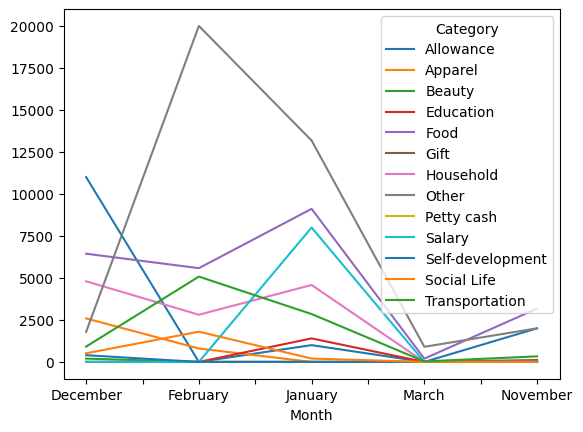

In [10]:
# month by month expense in each category

df['Category'].value_counts()
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name() # extract month name
df.pivot_table(index='Month', columns='Category', values='INR', aggfunc = 'sum')
df.pivot_table(index='Month', columns='Category', values='INR', aggfunc = 'sum', fill_value = 0) # replace NaN value with 0
df.pivot_table(index='Month', columns='Category', values='INR', aggfunc = 'sum', fill_value = 0).plot()

<Axes: xlabel='Month'>

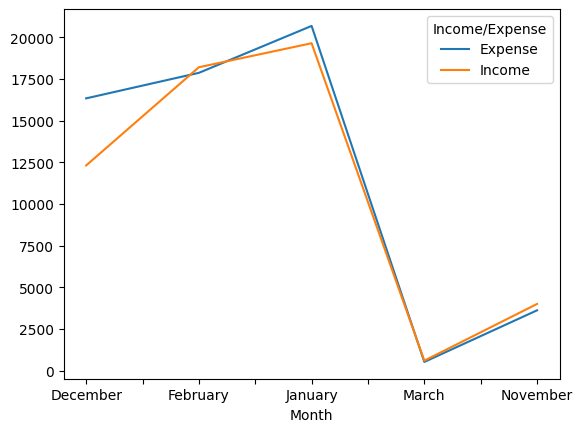

In [11]:
# Income/Expense plot

df.pivot_table(index = 'Month', columns = 'Income/Expense', values = 'INR', aggfunc = 'sum', fill_value = 0).plot()

<Axes: xlabel='Month'>

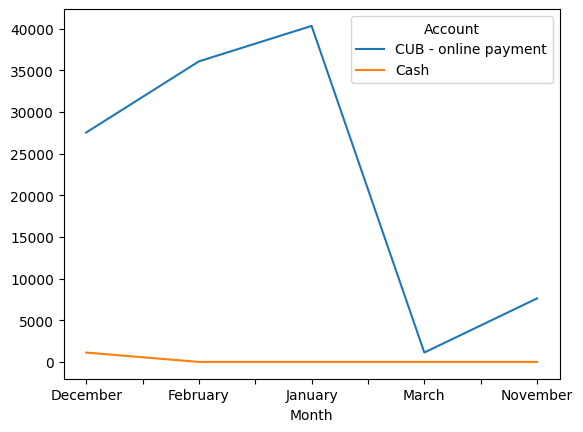

In [12]:

# How he spent money

df.pivot_table(index = 'Month', columns = 'Account', values = 'INR', aggfunc = 'sum', fill_value = 0).plot()

In [13]:
# textual data analysis
# vectorized string operation

a = np.array([1, 2, 3, 4, 5])
a * 4 

s = ['cat', 'mat', None, 'rat']
# [i.startswith('c') for i in s] # error cause here None is not string
s = pd.Series(['cat', 'mat', None, 'rat'])
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [14]:
df = pd.read_csv('./titanic.csv')
df.head()
df['Name']

# common function
df['Name'].str.lower()
df['Name'].str.upper()
df['Name'].str.capitalize()
df['Name'].str.title() # new word first letter capital

# len
df['Name'].str.len()
df[df['Name'].str.len() == df['Name'].str.len().max()]
df['Name'][df['Name'].str.len() == df['Name'].str.len().max()].values[0]

# stripe -> remove unnecessary space
'   Partho  '.strip()
df['Name'].str.strip()

# split
df['Name'].str.split(',')
df['lastname'] = df['Name'].str.split(',').str.get(0) # get all surname

# find only Mr. & Ms.
df['Name'].str.split(',').str.get(1).str.strip(' ').str.split(' ', n = 2) # here n = 2 means total 2 comma (,)
df['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n = 1, expand = True) # expand = True -> series to Dataframe
df[['title', 'firstname']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n = 1, expand = True)
df['title'].value_counts()

# Replace
df['title'] = df['title'].str.replace('Ms.', 'Miss.')
df['title'] = df['title'].str.replace('Mlle.', 'Miss.')
df['title'].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Lady.          1
Mme.           1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [15]:
# filtering

df[df['firstname'].str.startswith('A')]
df[df['firstname'].str.endswith('A')]
df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [16]:
# apply regex

# search (john) -> both case
df[df['firstname'].str.contains('john', case = False)]

# find lastname with start and end char are vowel
df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')] # ^ -> first char, $ -> last char,
df[df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')] # start and end with consonant 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr.,Henry Jr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [17]:
# slicing

df['Name'].str[:4]
df['Name'].str[::2] # alternate char
df['Name'].str[::-1] # rev

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

In [18]:
# timestamp object -> particular moment in time (13 aug 2024 at 1.45am)
# creating a timestamp

pd.Timestamp('2024/8/10')
type(pd.Timestamp('2024/8/10')) # timestamp object 
pd.Timestamp('2024-8-10')
pd.Timestamp('2024, 8, 10')
pd.Timestamp('2024')
pd.Timestamp('13 Aug 2024')
pd.Timestamp(2024, 8, 13, 1, 48, 12)
pd.Timestamp('13 Aug 2024 1:45PM')
pd.Timestamp('13 Aug 2024 1:45AM')

Timestamp('2024-08-13 01:45:00')

In [19]:
# datetime object 

import datetime as dt
dt.datetime(2024, 8, 13, 1, 45, 54)
x = pd.Timestamp(dt.datetime(2024, 8, 13, 1, 45, 54))

# fetching attribute

x.year
x.month
x.day
x.hour
x.minute
x.second

54

In [20]:
# Why need Timestamp when inbuilt datetime was there -> datetime slow while working with huge data so datetime64 dtype encodes data as 64-bit integers 

date = np.array('2024-08-13', dtype = np.datetime64)
# print(date)
date + np.arange(12)


array(['2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
       '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
       '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24'],
      dtype='datetime64[D]')

In [21]:
# Datetime Index -> collection of pandas timestamp

# using string
pd.DatetimeIndex(['2024/8/8', '2022/1/5', '2023/3/13']) # datetimeIndex object (store multiple date)
pd.DatetimeIndex(['2024/8/8', '2022/1/5', '2023/3/13'])[0] # timestamp object (store single date)

# using python datetime object
pd.DatetimeIndex([dt.datetime(2023, 2, 5), dt.datetime(2022, 4, 23), dt.datetime(2021, 7, 19)])

# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023, 2, 5), pd.Timestamp(2022, 4, 23), pd.Timestamp(2021, 7, 19)])

# using datetimeindex as series object 
pd.Series([9, 1, 3], index = dt_index)

2023-02-05    9
2022-04-23    1
2021-07-19    3
dtype: int64

In [22]:
# date range function -> generate daily date on given range

pd.date_range(start = '2024/8/5', end = '2024/8/15', freq = 'D') # all date
pd.date_range(start = '2024/8/5', end = '2024/8/15', freq = '2D') # alternate date
pd.date_range(start = '2024/8/5', end = '2024/8/15', freq = '3D') # skip 2 date
pd.date_range(start = '2024/8/5', end = '2024/8/15', freq = 'B') # business day (Mon - Fri)
pd.date_range(start = '2024/8/5', end = '2024/9/15', freq = 'W') # one week per day (by default print sunday)
pd.date_range(start = '2024/8/5', end = '2024/9/15', freq = 'W-Thu') # one week per day  (only Thursday)
# pd.date_range(start='2024/8/5', end='2024/8/15', freq='H') # hourly data (every hour data)
pd.date_range(start = '2024/8/5', end = '2024/8/15', freq = 'h') # hourly data (every hour data)
pd.date_range(start = '2024/8/5', end = '2024/8/15', freq = '6h') # hourly data (every 6 hour data)
# pd.date_range(start='2024/8/5', end='2024/8/15', freq='6H') # hourly data (every 6 hour data)
pd.date_range(start = '2024/8/5', end = '2024/12/15', freq = 'MS') # Month start
# pd.date_range(start='2024/8/5', end='2024/12/15', freq='M') # Month end
pd.date_range(start = '2024/8/5', end = '2024/12/15', freq = 'ME') # Month end
# pd.date_range(start='2024/8/5', end='2034/12/15', freq='AS') # Year start
pd.date_range(start = '2024/8/5', end = '2034/12/15', freq = 'YS') # Year start
# pd.date_range(start='2024/8/5', end='2034/12/15', freq='A') # Year end
pd.date_range(start = '2024/8/5', end = '2034/12/15', freq = 'YE') # Year end
pd.date_range(start = '2024/8/5', periods = 25, freq = 'D') # start to next 26 days
# pd.date_range(start='2024/8/5', periods=25, freq='H') # start to next 26 hour
pd.date_range(start = '2024/8/5', periods = 25, freq = 'h') # start to next 26 hour

DatetimeIndex(['2024-08-05 00:00:00', '2024-08-05 01:00:00',
               '2024-08-05 02:00:00', '2024-08-05 03:00:00',
               '2024-08-05 04:00:00', '2024-08-05 05:00:00',
               '2024-08-05 06:00:00', '2024-08-05 07:00:00',
               '2024-08-05 08:00:00', '2024-08-05 09:00:00',
               '2024-08-05 10:00:00', '2024-08-05 11:00:00',
               '2024-08-05 12:00:00', '2024-08-05 13:00:00',
               '2024-08-05 14:00:00', '2024-08-05 15:00:00',
               '2024-08-05 16:00:00', '2024-08-05 17:00:00',
               '2024-08-05 18:00:00', '2024-08-05 19:00:00',
               '2024-08-05 20:00:00', '2024-08-05 21:00:00',
               '2024-08-05 22:00:00', '2024-08-05 23:00:00',
               '2024-08-06 00:00:00'],
              dtype='datetime64[ns]', freq='h')

In [23]:
# to_datetime -> convert an existing object to pandas timestamp/datetimeindex object

s = pd.Series(['2024/8/8', '2022/1/5', '2023/3/13'])
s
pd.to_datetime(s) # datetime64 object
pd.to_datetime(s).dt.month
pd.to_datetime(s).dt.year
pd.to_datetime(s).dt.day_name()
pd.to_datetime(s).dt.month_name()

0     August
1    January
2      March
dtype: object

In [24]:
# with error 
s = pd.Series(['2024/8/8', '2022/1/5', '2023/230/13'])
pd.to_datetime(s, errors = 'coerce').dt.year

0    2024.0
1    2022.0
2       NaN
dtype: float64

In [25]:
df = pd.read_csv('./expense_data.csv')
df.shape
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [26]:
# dt accessor

df['Date'].dt.year
df['Date'].dt.month
df['Date'].dt.month_name()
df['Date'].dt.day_name()
df[df['Date'].dt.is_month_end]
df[df['Date'].dt.is_quarter_start]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
151,2022-01-01 21:46:00,CUB - online payment,Food,NaN,Snacks,85.0,Expense,NaN,85.0,INR,85.0
152,2022-01-01 21:45:00,CUB - online payment,Allowance,NaN,From dad,1000.0,Income,NaN,1000.0,INR,1000.0


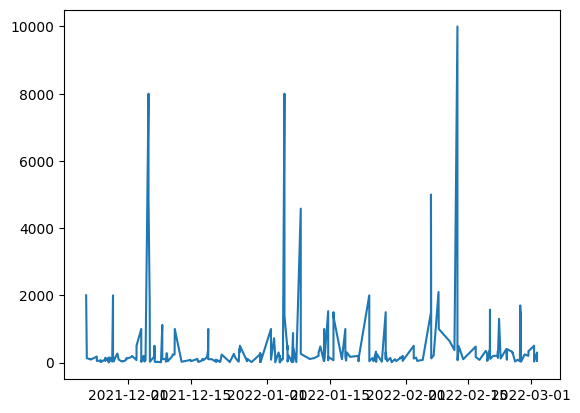

In [27]:
# graph plotting

plt.plot(df['Date'], df['INR'])

<Axes: xlabel='day_name'>

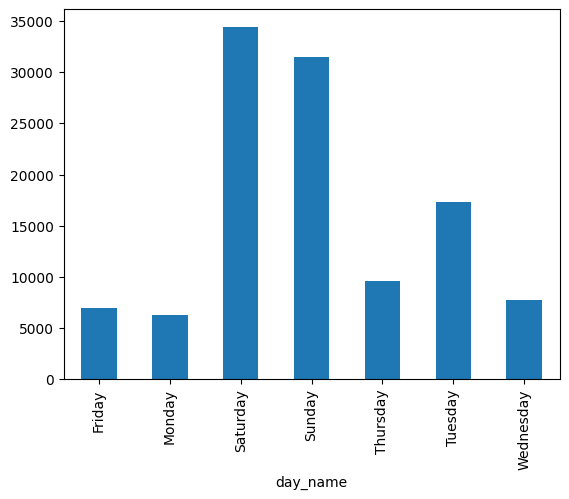

In [28]:
# day name wise bar chart

df['day_name'] = df['Date'].dt.day_name()
df.head()
df.groupby('day_name')['INR'].sum().plot(kind = 'bar')

<Axes: xlabel='month_name'>

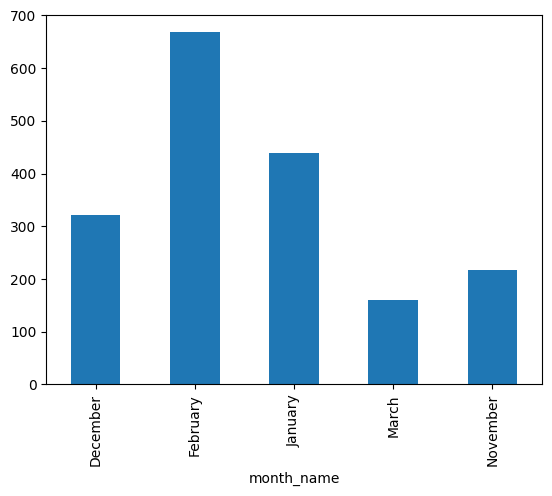

In [29]:
# month wise bar chart

df['month_name'] = df['Date'].dt.month_name()
df.head()
df.groupby('month_name')['INR'].mean().plot(kind = 'bar')